In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
train_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
test_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')

# Examine the first few rows and basic info of the training data
print("Training Data Shape:", train_df.shape)
print("\nFirst few rows of training data:")
print(train_df.head())
print("\nTraining Data Info:")
print(train_df.info())

Training Data Shape: (1258, 6)

First few rows of training data:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None


Data types before scaling:
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


/tmp/ipykernel_30/1216647712.py:62: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


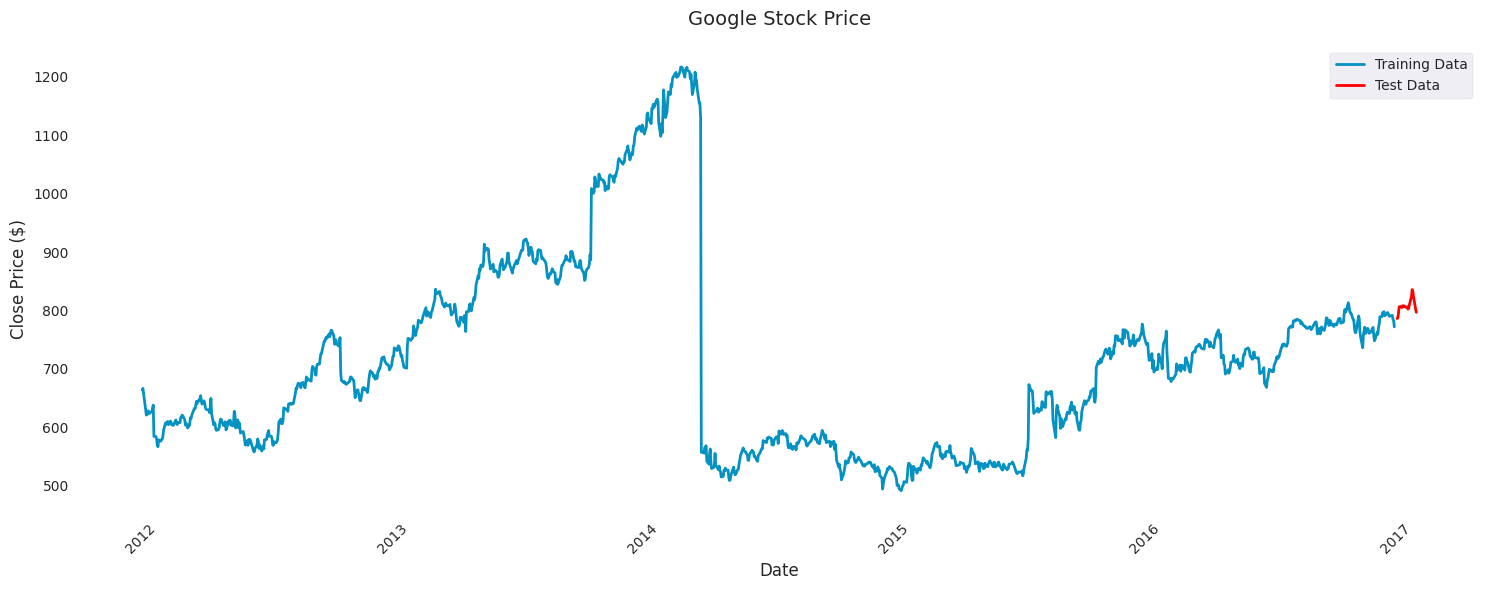


Dataset Shapes:
Training shapes: X: (976, 30, 5), y: (976, 1)
Validation shapes: X: (222, 30, 5), y: (222, 1)
Test shapes: X: (0,), y: (0,)

Sequence Details:
Looking back: 30 days
Predicting ahead: 1 day(s)
Features used: ['Open', 'High', 'Low', 'Close', 'Volume']


In [11]:
#clean and prepare the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def prepare_data():
    # Load datasets with Kaggle paths
    train_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
    test_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
    
    # Convert Date to datetime
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    test_df['Date'] = pd.to_datetime(test_df['Date'])
    
    # Clean numeric columns
    for df in [train_df, test_df]:
        # Clean Volume if it's string type
        if df['Volume'].dtype == 'object':
            df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
        # Clean Close if it's string type
        if df['Close'].dtype == 'object':
            df['Close'] = df['Close'].str.replace(',', '').astype(float)
    
    # Set Date as index
    train_df.set_index('Date', inplace=True)
    test_df.set_index('Date', inplace=True)
    
    # Create feature matrix
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Print data info before scaling
    print("Data types before scaling:")
    print(train_df.dtypes)
    
    # Normalize the features
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_df[features])
    test_scaled = scaler.transform(test_df[features])
    
    # Convert back to dataframe with feature names
    train_scaled = pd.DataFrame(train_scaled, columns=features, index=train_df.index)
    test_scaled = pd.DataFrame(test_scaled, columns=features, index=test_df.index)
    
    return train_scaled, test_scaled, scaler, train_df, test_df

def create_sequences(data, seq_length, pred_horizon=1):
    """
    Create sequences of data for training
    data: DataFrame of scaled features
    seq_length: number of time steps to look back
    pred_horizon: number of days to predict ahead
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_horizon + 1):
        X.append(data.iloc[i:(i + seq_length)].values)
        y.append(data.iloc[i + seq_length:i + seq_length + pred_horizon]['Close'].values)
    return np.array(X), np.array(y)

#visualize the data
def plot_stock_data(train_df, test_df):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(15, 6))
    
    # Define primary plotting colors
    ax.plot(train_df.index, train_df['Close'], 
            label='Training Data', 
            color='#0492C2',
            linewidth=2)
    
    ax.plot(test_df.index, test_df['Close'], 
            label='Test Data', 
            color='red',
            linewidth=2)
    
    # Customize the plot
    ax.set_title('Google Stock Price', fontsize=14, pad=15)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Close Price ($)', fontsize=12)
    
    # Customize axes
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Set axis colors to black
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    
    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(rotation=45)
    
    # Add legend
    ax.legend(fontsize=10, frameon=True)
    
    # Set background color
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
# Main execution
seq_length = 30  # Look back 30 days
pred_horizon = 1  # Predict 1 day ahead

# Prepare the data
train_scaled, test_scaled, scaler, train_df_orig, test_df_orig = prepare_data()

# Plot original data
plot_stock_data(train_df_orig, test_df_orig)

# Split training data into train and validation sets (80-20 split)
train_size = int(len(train_scaled) * 0.8)
train_data = train_scaled[:train_size]
val_data = train_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length, pred_horizon)
X_val, y_val = create_sequences(val_data, seq_length, pred_horizon)
X_test, y_test = create_sequences(test_scaled, seq_length, pred_horizon)

# Print shapes to verify
print("\nDataset Shapes:")
print(f"Training shapes: X: {X_train.shape}, y: {y_train.shape}")
print(f"Validation shapes: X: {X_val.shape}, y: {y_val.shape}")
print(f"Test shapes: X: {X_test.shape}, y: {y_test.shape}")

# Print some additional information
print("\nSequence Details:")
print(f"Looking back: {seq_length} days")
print(f"Predicting ahead: {pred_horizon} day(s)")
print(f"Features used: {train_scaled.columns.tolist()}")

Shapes before scaling:
Training data shape: (1258, 5)
Test data shape: (20, 5)

Data types after cleaning:
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


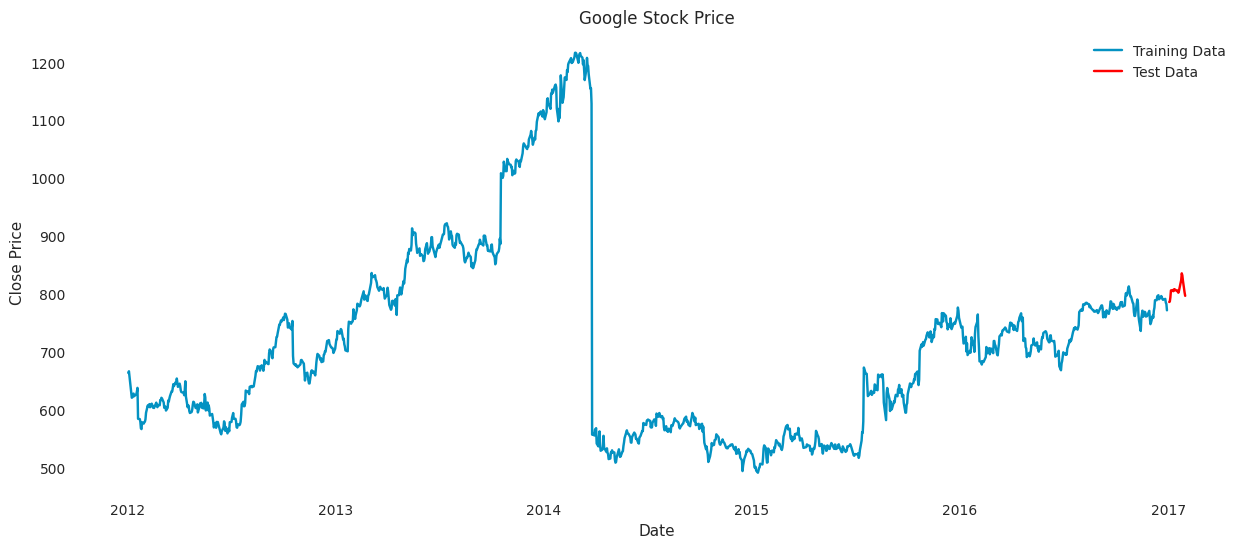


Detailed Dataset Information:
Original training data shape: (1258, 5)
Original test data shape: (20, 5)

Sequence Shapes:
Training shapes: X: (976, 30, 5), y: (976, 1)
Validation shapes: X: (222, 30, 5), y: (222, 1)
Test shapes: X: (1, 19, 5), y: (1, 1)

Sequence Details:
Training sequence length: 30 days
Test sequence length: 19 days
Predicting ahead: 1 day(s)
Features used: ['Open', 'High', 'Low', 'Close', 'Volume']


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def prepare_data():
    # Load datasets
    train_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
    test_df = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
    
    # Convert Date to datetime
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    test_df['Date'] = pd.to_datetime(test_df['Date'])
    
    # Clean numeric columns by removing commas
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    for df in [train_df, test_df]:
        for column in numeric_columns:
            if df[column].dtype == 'object':
                df[column] = df[column].str.replace(',', '').astype(float)
    
    # Set Date as index
    train_df.set_index('Date', inplace=True)
    test_df.set_index('Date', inplace=True)
    
    # Print shapes and data types before scaling
    print("Shapes before scaling:")
    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")
    print("\nData types after cleaning:")
    print(train_df.dtypes)
    
    # Normalize the features
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_df[numeric_columns])
    test_scaled = scaler.transform(test_df[numeric_columns])
    
    # Convert back to dataframe with feature names
    train_scaled = pd.DataFrame(train_scaled, columns=numeric_columns, index=train_df.index)
    test_scaled = pd.DataFrame(test_scaled, columns=numeric_columns, index=test_df.index)
    
    return train_scaled, test_scaled, scaler, train_df, test_df

def create_sequences(data, seq_length, pred_horizon=1):
    """
    Create sequences of data for training
    data: DataFrame of scaled features
    seq_length: number of time steps to look back
    pred_horizon: number of days to predict ahead
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_horizon + 1):
        X.append(data.iloc[i:(i + seq_length)].values)
        y.append(data.iloc[i + seq_length:i + seq_length + pred_horizon]['Close'].values)
    return np.array(X), np.array(y)

def plot_stock_data(train_df, test_df):
    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.spines['left'].set_visible(True)  
    ax.spines['bottom'].set_visible(True)
    ax.plot(train_df.index, train_df['Close'], label='Training Data', color='#0492C2')
    ax.plot(test_df.index, test_df['Close'], label='Test Data', color='#FF0000')
    ax.set_title('Google Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    plt.show()
    
# Parameters
seq_length = 30  # Look back 30 days
pred_horizon = 1  # Predict 1 day ahead

# Prepare the data
train_scaled, test_scaled, scaler, train_df_orig, test_df_orig = prepare_data()

# Plot original data
plot_stock_data(train_df_orig, test_df_orig)

# Split training data into train and validation sets (80-20 split)
train_size = int(len(train_scaled) * 0.8)
train_data = train_scaled[:train_size]
val_data = train_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length, pred_horizon)
X_val, y_val = create_sequences(val_data, seq_length, pred_horizon)

# Adjust sequence length for test set due to smaller size
test_seq_length = min(seq_length, len(test_scaled) - pred_horizon)
X_test, y_test = create_sequences(test_scaled, test_seq_length, pred_horizon)

# Print detailed information
print("\nDetailed Dataset Information:")
print(f"Original training data shape: {train_scaled.shape}")
print(f"Original test data shape: {test_scaled.shape}")
print("\nSequence Shapes:")
print(f"Training shapes: X: {X_train.shape}, y: {y_train.shape}")
print(f"Validation shapes: X: {X_val.shape}, y: {y_val.shape}")
print(f"Test shapes: X: {X_test.shape}, y: {y_test.shape}")

# Print sequence details
print("\nSequence Details:")
print(f"Training sequence length: {seq_length} days")
print(f"Test sequence length: {test_seq_length} days")
print(f"Predicting ahead: {pred_horizon} day(s)")
print(f"Features used: {train_scaled.columns.tolist()}")


Descriptive Statistics:
                              Training Data
Average Price                        712.67
Price Std Dev                        164.75
Min Price                            491.20
Max Price                           1216.83
Avg Daily Returns (%)                  0.04
Daily Returns Volatility (%)           2.05
Average Volume                   3158106.76
Volume Std Dev                   2273725.58


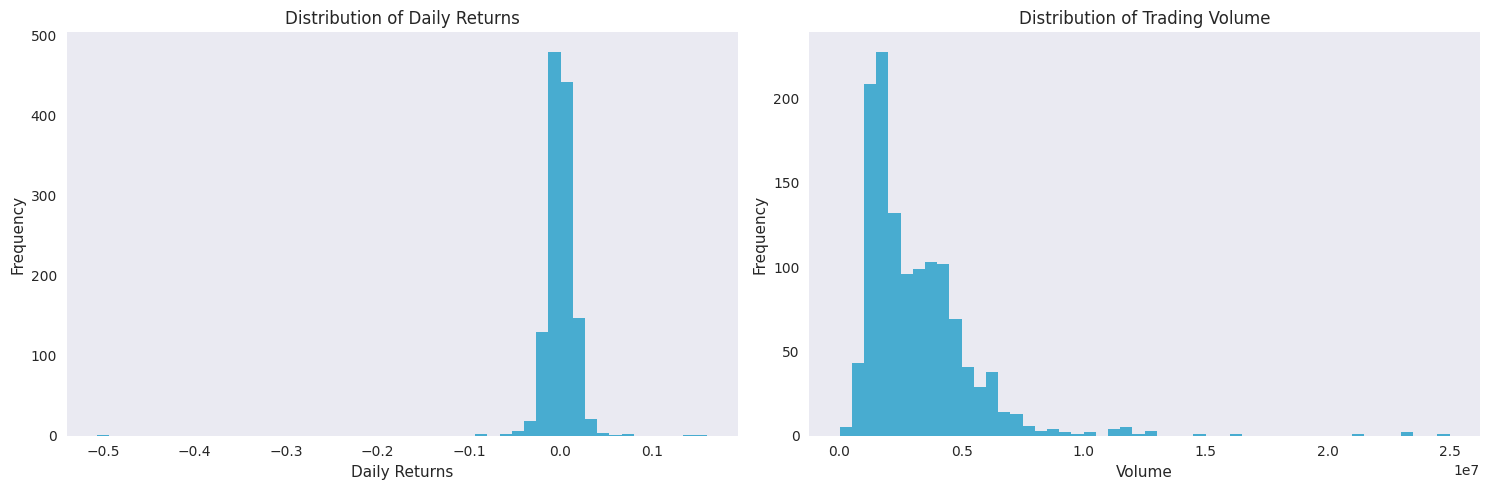

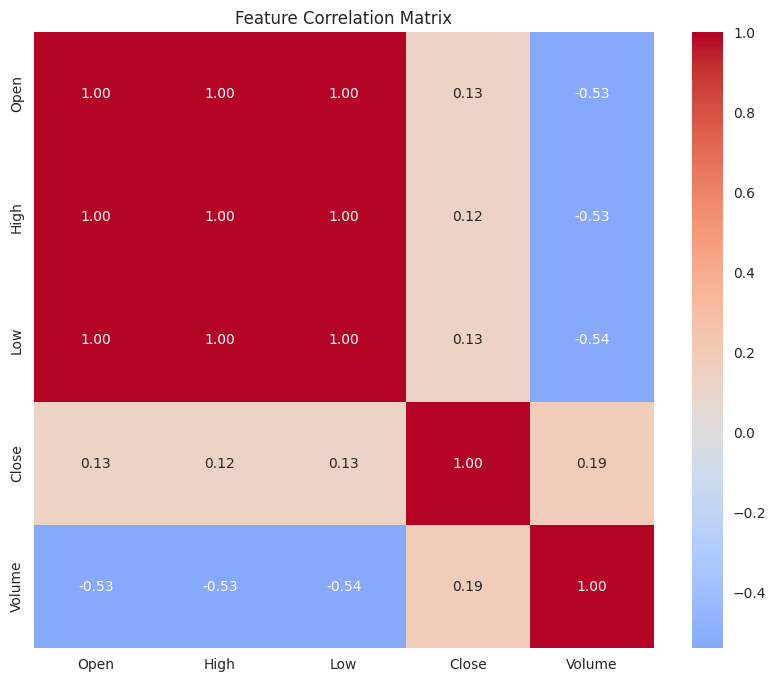

In [34]:
#Generate Descriptives
def calculate_descriptive_stats(train_df, test_df):
    # Convert Close prices to numeric, removing any commas
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    # Ensure numeric columns
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_columns:
        if train_df[col].dtype == 'object':
            train_df[col] = pd.to_numeric(train_df[col].str.replace(',', ''))
        if test_df[col].dtype == 'object':
            test_df[col] = pd.to_numeric(test_df[col].str.replace(',', ''))
    
    # Calculate daily returns
    train_returns = train_df['Close'].pct_change()
    test_returns = test_df['Close'].pct_change()
    
    # Create descriptive statistics
    train_stats = pd.DataFrame({
        'Training Data': [
            train_df['Close'].mean(),
            train_df['Close'].std(),
            train_df['Close'].min(),
            train_df['Close'].max(),
            train_returns.mean() * 100,  # Convert to percentage
            train_returns.std() * 100,   # Convert to percentage
            train_df['Volume'].mean(),
            train_df['Volume'].std()
        ]
    }, index=['Average Price', 'Price Std Dev', 'Min Price', 'Max Price', 
              'Avg Daily Returns (%)', 'Daily Returns Volatility (%)',
              'Average Volume', 'Volume Std Dev'])
    
    print("\nDescriptive Statistics:")
    print(train_stats.round(2))  # Round to 2 decimal places for readability
    
    # Create subplots with better styling
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Returns distribution
    ax1.hist(train_returns.dropna(), bins=50, color='#0492C2', alpha=0.7)
    ax1.set_title('Distribution of Daily Returns')
    ax1.set_xlabel('Daily Returns')
    ax1.set_ylabel('Frequency')
    ax1.grid(False)
    
    # Volume distribution
    ax2.hist(train_df['Volume'], bins=50, color='#0492C2', alpha=0.7)
    ax2.set_title('Distribution of Trading Volume')
    ax2.set_xlabel('Volume')
    ax2.set_ylabel('Frequency')
    ax2.grid(False)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation matrix
    plt.figure(figsize=(10, 8))
    correlation = train_df[numeric_columns].corr()
    sns.heatmap(correlation, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()
    
    return train_stats

# Call the function
stats = calculate_descriptive_stats(train_df, test_df)


Training LSTM model...
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0424 - mae: 0.1426 - val_loss: 7.1030e-04 - val_mae: 0.0220
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0066 - mae: 0.0548 - val_loss: 7.1529e-04 - val_mae: 0.0225
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0054 - mae: 0.0461 - val_loss: 0.0028 - val_mae: 0.0498
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0069 - mae: 0.0481 - val_loss: 4.6089e-04 - val_mae: 0.0173
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0034 - mae: 0.0385 - val_loss: 0.0026 - val_mae: 0.0473
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mae: 0.0436 - val_loss: 4.0478e-04 - val_mae: 0.0161
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0038 - mae: 0.0379 - val_loss: 4.0357e-04 - val_mae: 0.0164
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0042 - mae: 0.0377 - val_loss: 0.0034 - val_mae: 0.0554
Epoch 9/100


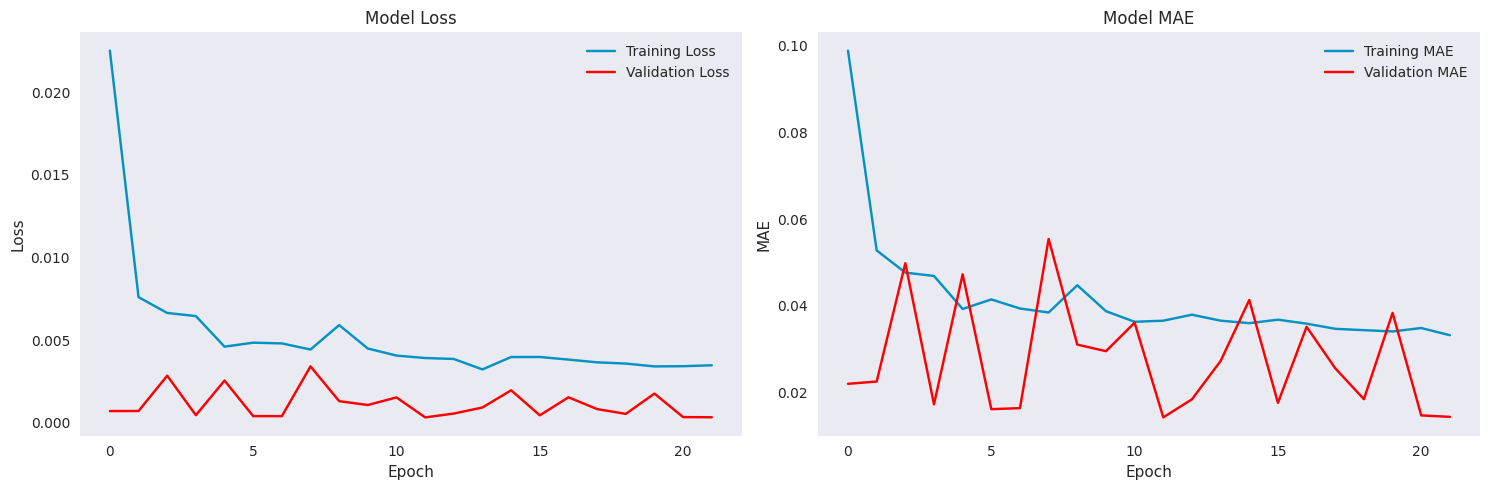


Training GRU model...
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0549 - mae: 0.1717 - val_loss: 0.0067 - val_mae: 0.0793
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0047 - mae: 0.0495 - val_loss: 0.0025 - val_mae: 0.0473
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0038 - mae: 0.0438 - val_loss: 4.4431e-04 - val_mae: 0.0182
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0051 - mae: 0.0438 - val_loss: 0.0015 - val_mae: 0.0348
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0057 - mae: 0.0469 - val_loss: 2.6031e-04 - val_mae: 0.0118
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035 - mae: 0.0363 - val_loss: 2.4237e-04 - val_mae: 0.0119
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - mae: 0.0334 - val_loss: 3.0023e-04 - val_mae: 0.0143
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0037 - mae: 0.0360 - val_loss: 3.6975e-04 - val_mae: 0.0149
Epoch 9/100
3

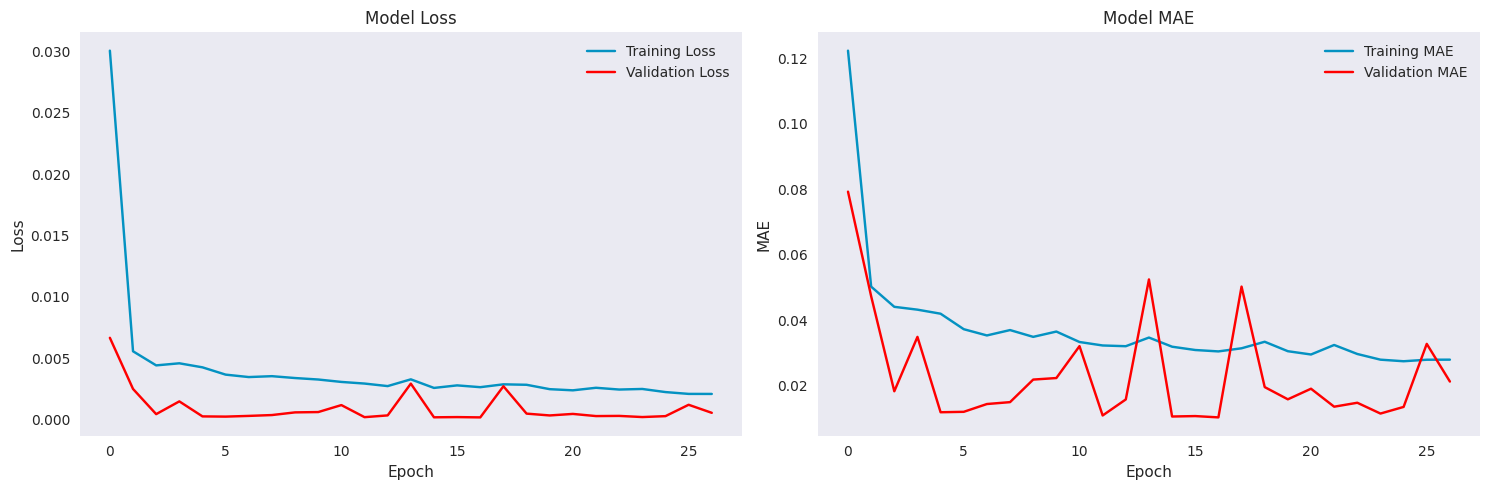


Training RNN model...
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2465 - mae: 0.3867 - val_loss: 7.8508e-04 - val_mae: 0.0221
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1038 - mae: 0.2503 - val_loss: 8.8422e-04 - val_mae: 0.0226
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0576 - mae: 0.1853 - val_loss: 0.0022 - val_mae: 0.0409
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0405 - mae: 0.1561 - val_loss: 0.0021 - val_mae: 0.0411
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0311 - mae: 0.1400 - val_loss: 0.0063 - val_mae: 0.0755
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0244 - mae: 0.1246 - val_loss: 5.4752e-04 - val_mae: 0.0177
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0235 - mae: 0.1140 - val_loss: 4.4832e-04 - val_mae: 0.0164
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0190 - mae: 0.1064 - val_loss: 0.0013 - val_mae: 0.0312
Epoch 9/100
31/31

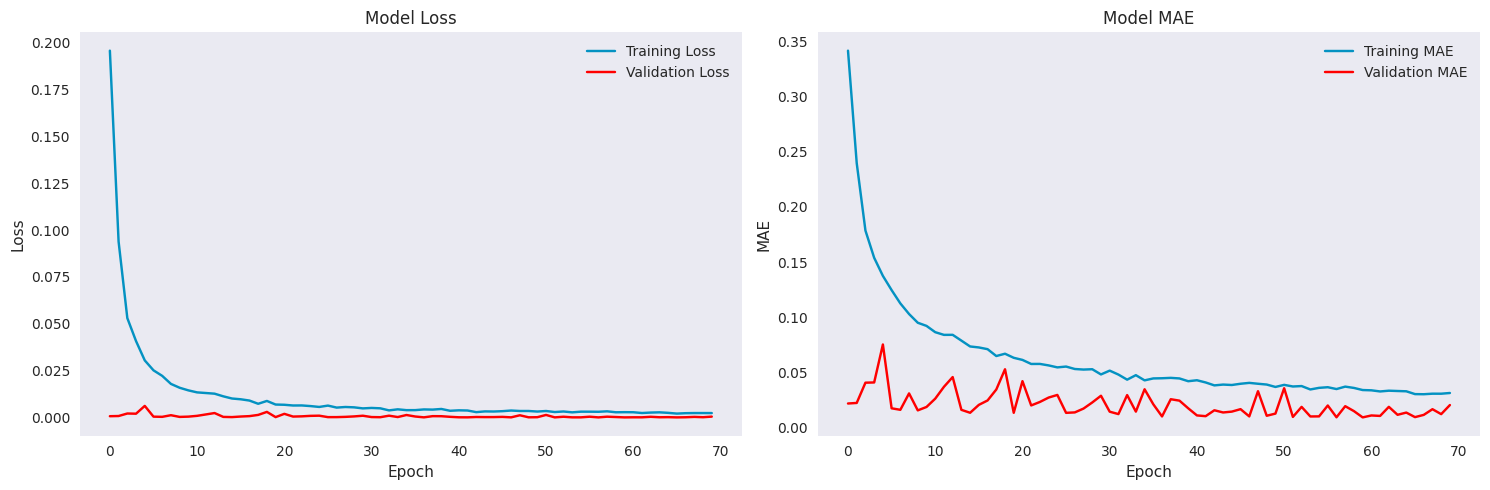

In [26]:
#Build and train the RNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(sequence_length, n_features, model_type='LSTM'):
    """
    Build RNN model based on specified type
    """
    model = Sequential()
    
    if model_type == 'LSTM':
        model.add(LSTM(units=50, return_sequences=True, 
                      input_shape=(sequence_length, n_features)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50))
        model.add(Dropout(0.2))
    
    elif model_type == 'GRU':
        model.add(GRU(units=50, return_sequences=True, 
                     input_shape=(sequence_length, n_features)))
        model.add(Dropout(0.2))
        model.add(GRU(units=50))
        model.add(Dropout(0.2))
    
    elif model_type == 'RNN':
        model.add(SimpleRNN(units=50, return_sequences=True, 
                          input_shape=(sequence_length, n_features)))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(units=50))
        model.add(Dropout(0.2))
    
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])
    
    return model

# Training setup
def train_model(model, X_train, y_train, X_val, y_val, epochs=100):
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )
    
    return history

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    ax1.plot(history.history['loss'], color='#0492C2', label='Training Loss')
    ax1.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(False)
    
    # MAE plot
    ax2.plot(history.history['mae'], color='#0492C2', label='Training MAE')
    ax2.plot(history.history['val_mae'], color='red', label='Validation MAE')
    ax2.set_title('Model MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend()
    ax2.grid(False)
    
    plt.tight_layout()
    plt.show()

# Train and evaluate different models
models = {
    'LSTM': build_model(seq_length, n_features=5, model_type='LSTM'),
    'GRU': build_model(seq_length, n_features=5, model_type='GRU'),
    'RNN': build_model(seq_length, n_features=5, model_type='RNN')
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name} model...")
    history = train_model(model, X_train, y_train, X_val, y_val)
    results[name] = {
        'model': model,
        'history': history
    }
    plot_training_history(history)


LSTM Model Performance:
MSE: 172.95
MAE: 10.34
RMSE: 13.15


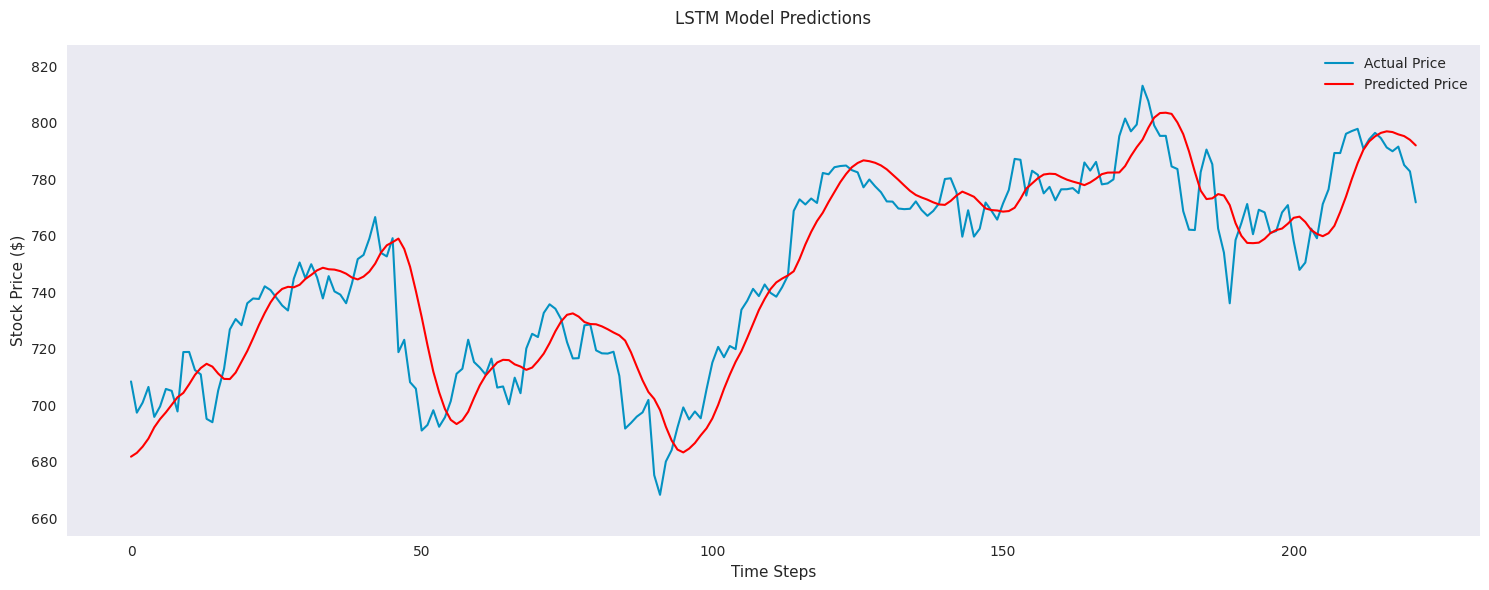


GRU Model Performance:
MSE: 94.44
MAE: 7.42
RMSE: 9.72


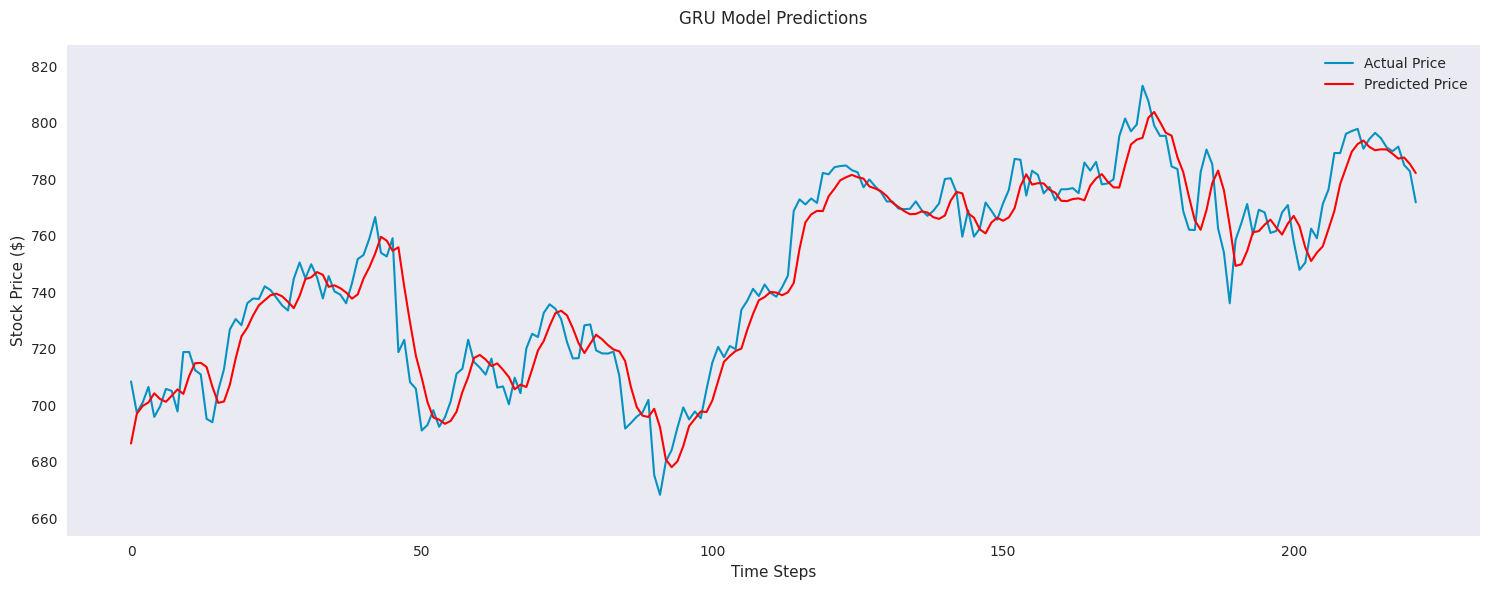


RNN Model Performance:
MSE: 81.79
MAE: 6.89
RMSE: 9.04


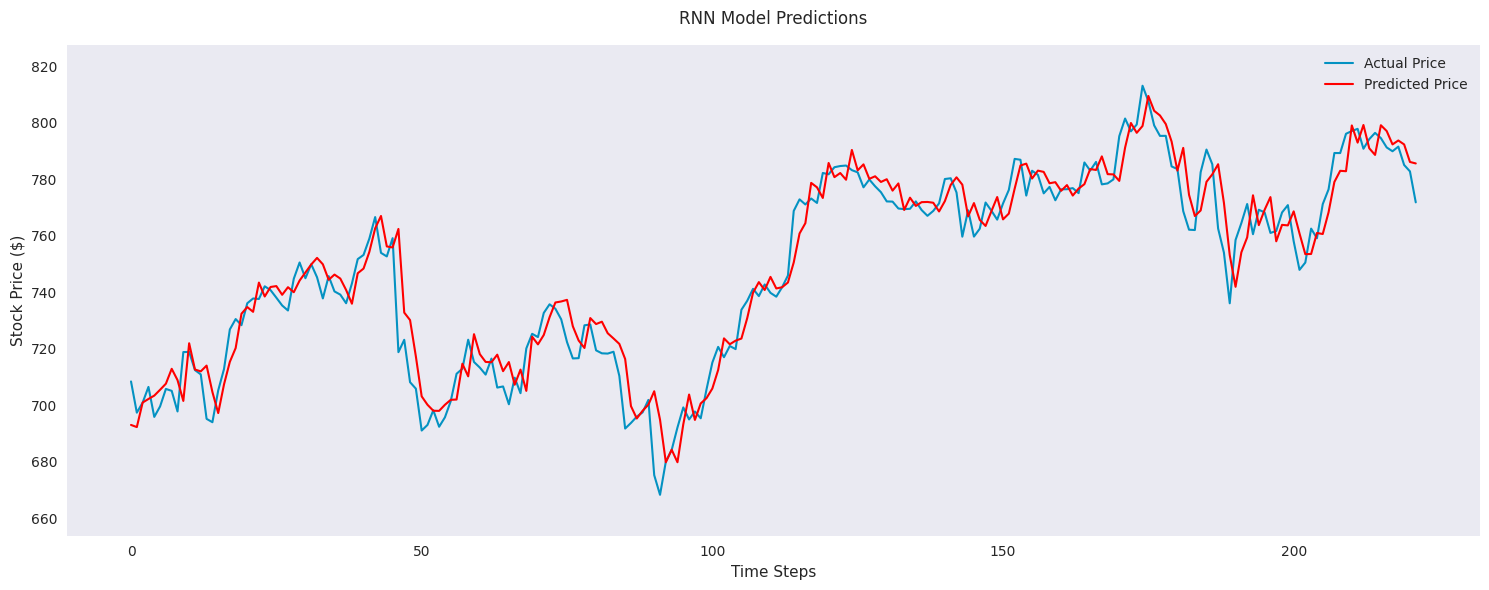

In [47]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_predictions(model, X, y_true, scaler, name):
    # Make predictions
    y_pred = model.predict(X)
    
    # Reshape data for inverse transform
    y_true_reshaped = y_true.reshape(-1, 1)
    y_pred_reshaped = y_pred.reshape(-1, 1)
    
    # Create dummy arrays with all features
    y_true_dummy = np.zeros((len(y_true), 5))  # 5 features
    y_pred_dummy = np.zeros((len(y_pred), 5))  # 5 features
    
    # Put the Close price in the correct position (assuming it's the 4th feature)
    y_true_dummy[:, 3] = y_true_reshaped.ravel()
    y_pred_dummy[:, 3] = y_pred_reshaped.ravel()
    
    # Inverse transform
    y_true_price = scaler.inverse_transform(y_true_dummy)[:, 3]
    y_pred_price = scaler.inverse_transform(y_pred_dummy)[:, 3]
    
    # Calculate metrics
    mse = mean_squared_error(y_true_price, y_pred_price)
    mae = mean_absolute_error(y_true_price, y_pred_price)
    rmse = np.sqrt(mse)
    
    print(f"\n{name} Model Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    return y_true_price, y_pred_price

#Visualize Predictions
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(15, 6))
    plt.plot(y_true, color='#0492C2', label='Actual Price')
    plt.plot(y_pred, color='red', label='Predicted Price')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(False)
    plt.show()

# Evaluate all models
for name, result in results.items():
    # Make predictions
    y_pred = result['model'].predict(X_val, verbose=0)  # Added verbose=0 to reduce output
    
    # Prepare for inverse transform
    y_true_dummy = np.zeros((len(y_val), 5))
    y_pred_dummy = np.zeros((len(y_pred), 5))
    y_true_dummy[:, 3] = y_val.ravel()
    y_pred_dummy[:, 3] = y_pred.ravel()
    
    # Inverse transform
    y_true_price = scaler.inverse_transform(y_true_dummy)[:, 3]
    y_pred_price = scaler.inverse_transform(y_pred_dummy)[:, 3]
    
    # Calculate metrics
    mse = mean_squared_error(y_true_price, y_pred_price)
    mae = mean_absolute_error(y_true_price, y_pred_price)
    rmse = np.sqrt(mse)
    
    # Print metrics
    print(f"\n{name} Model Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Improved plotting
    plt.figure(figsize=(15, 6))
    plt.plot(y_true_price, color='#0492C2', label='Actual Price', linewidth=1.5)
    plt.plot(y_pred_price, color='red', label='Predicted Price', linewidth=1.5)
    plt.title(f'{name} Model Predictions', pad=15)
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(False)
    
    # Add price range buffer for better visualization
    price_range = y_true_price.max() - y_true_price.min()
    plt.ylim(y_true_price.min() - price_range*0.1, y_true_price.max() + price_range*0.1)
    
    plt.tight_layout()
    plt.show()